In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame=pd.read_csv("insurance.csv")

In [21]:
dataFrame.shape

(1338, 7)

In [3]:
dataFrame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataFrame["smoker"]=dataFrame["smoker"].replace(["yes","no"],[1,0])

In [5]:
dataFrame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [6]:
dataFrame["sex"]=dataFrame["sex"].replace(["female","male"],[1,0])

In [7]:
dataFrame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [8]:
dataFrame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
dataFrame["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
dataFrame["region"]=dataFrame["region"].replace(['southwest', 'southeast', 'northeast', 'northwest'],[-2,-1,1,2])

In [15]:
dataFrame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,-2,16884.92400
1,18,0,33.770,1,0,-1,1725.55230
2,28,0,33.000,3,0,-1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [17]:
dataFrame.corr()["charges"]

age         0.299008
sex        -0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.017462
charges     1.000000
Name: charges, dtype: float64

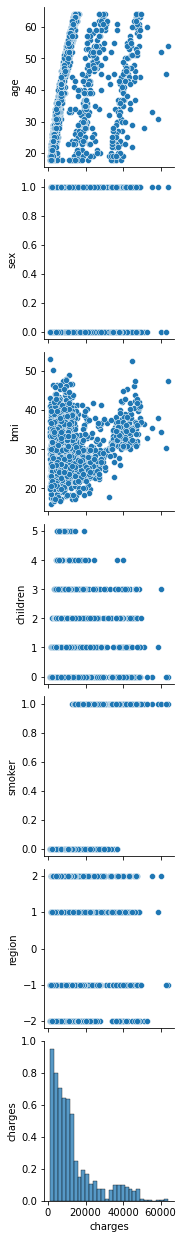

In [18]:
sbn.pairplot(dataFrame,x_vars=["charges"])

C:\Users\sumey\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

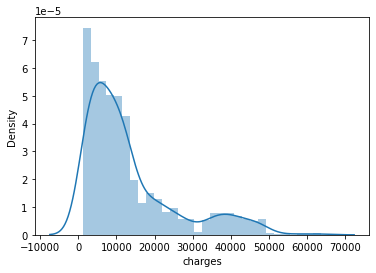

In [22]:
sbn.distplot(dataFrame["charges"])

In [23]:
yeniData=dataFrame.sort_values("charges",ascending=False).iloc[13:]

C:\Users\sumey\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

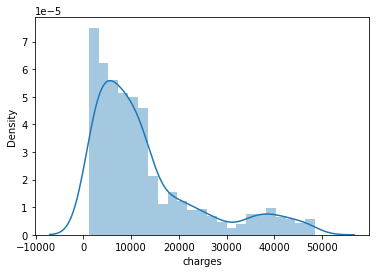

In [24]:
sbn.distplot(yeniData["charges"])

In [27]:
y=yeniData["charges"].values
x=yeniData.drop("charges",axis=1).values

In [28]:
y

array([48549.17835, 48517.56315, 48173.361  , ...,  1135.9407 ,
        1131.5066 ,  1121.8739 ])

In [29]:
x

array([[54.   ,  0.   , 40.565,  3.   ,  1.   ,  1.   ],
       [61.   ,  1.   , 36.385,  1.   ,  1.   ,  1.   ],
       [60.   ,  0.   , 39.9  ,  0.   ,  1.   , -2.   ],
       ...,
       [18.   ,  0.   , 33.33 ,  0.   ,  0.   , -1.   ],
       [18.   ,  0.   , 30.14 ,  0.   ,  0.   , -1.   ],
       [18.   ,  0.   , 23.21 ,  0.   ,  0.   , -1.   ]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
x_train=scaler.fit_transform(x_train)

In [35]:
x_test=scaler.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [97]:
model= Sequential()

model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [98]:
model.fit( x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=200)

Epoch 1/200
29/29 [==============================] - 0s 5ms/step - loss: 294128992.0000 - val_loss: 304546208.0000
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 294046464.0000 - val_loss: 304349152.0000
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 293437600.0000 - val_loss: 302884672.0000
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 289403264.0000 - val_loss: 293861312.0000
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 268136144.0000 - val_loss: 251324032.0000
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 195053520.0000 - val_loss: 141934144.0000
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 109549432.0000 - val_loss: 102124504.0000
Epoch 8/200
29/29 [==============================] - 0s 2ms/step - loss: 96298424.0000 - val_loss: 94691160.0000
Epoch 9/200
29/29 [==============================] - 0s 2ms/step - loss: 90241240.

<AxesSubplot:>

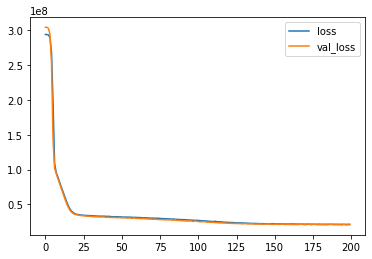

In [99]:
kayipVeri=pd.DataFrame(model.history.history)
kayipVeri.plot()

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
tahminler=model.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [102]:
mean_absolute_error(y_test,tahminler)

2823.2069373296167

In [103]:
mean_squared_error(y_test,tahminler)

20971863.6314286

In [104]:
yeniData.describe()

,age,sex,bmi,children,smoker,region,charges
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,39.101132,0.495849,30.592932,1.098868,0.196981,-0.024151,12874.220267
std,14.026476,0.500172,6.071812,1.207369,0.397868,1.568965,11472.954102
min,18.000000,0.000000,15.960000,0.000000,0.000000,-2.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,-1.000000,4718.203550
50%,39.000000,0.000000,30.300000,1.000000,0.000000,-1.000000,9283.562000
75%,51.000000,1.000000,34.485000,2.000000,0.000000,1.000000,16085.127500
max,64.000000,1.000000,53.130000,5.000000,1.000000,2.000000,48549.178350


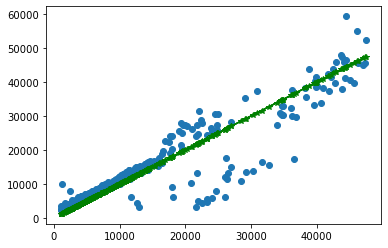

In [105]:
plt.scatter(y_test,tahminler)
plt.plot(y_test,y_test,"g-*")

In [106]:
yeniData.iloc[5]

age            58.00000
sex             0.00000
bmi            36.95500
children        2.00000
smoker          1.00000
region          2.00000
charges     47496.49445
Name: 55, dtype: float64

In [107]:
yeniKisi=yeniData.drop("charges",axis=1).iloc[5]

In [108]:
yeniKisi=scaler.transform(yeniKisi.values.reshape(-1,6))

In [109]:
model.predict(yeniKisi)

1/1 [==============================] - 0s 14ms/step


array([[46984.273]], dtype=float32)